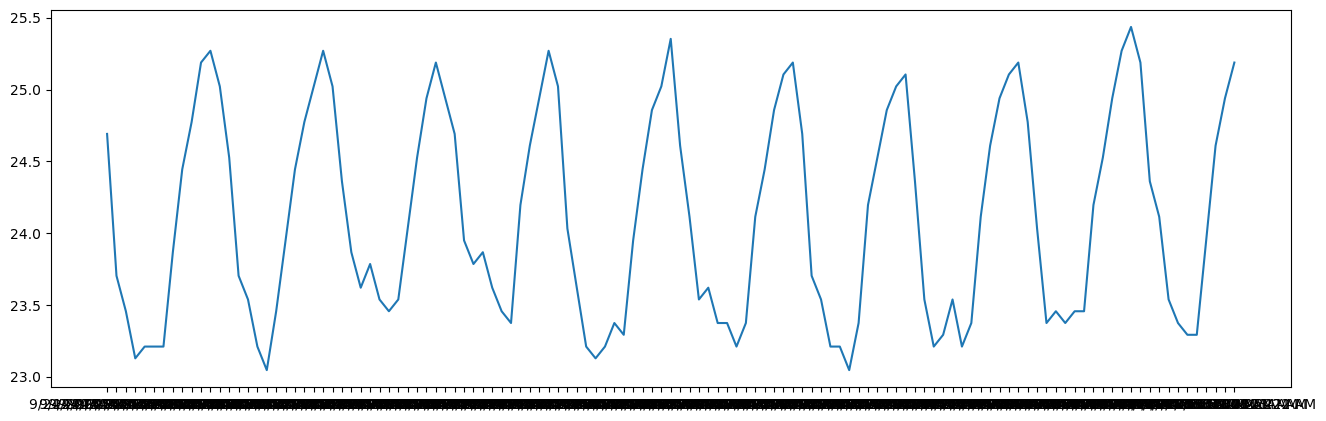

Train on 84 samples
Epoch 1/100
84/84 - 4s - loss: 0.1837
Epoch 2/100
84/84 - 0s - loss: 0.1269
Epoch 3/100
84/84 - 0s - loss: 0.1010
Epoch 4/100
84/84 - 0s - loss: 0.0853
Epoch 5/100
84/84 - 0s - loss: 0.0737
Epoch 6/100
84/84 - 0s - loss: 0.0628
Epoch 7/100
84/84 - 0s - loss: 0.0529
Epoch 8/100
84/84 - 0s - loss: 0.0437
Epoch 9/100
84/84 - 0s - loss: 0.0354
Epoch 10/100
84/84 - 0s - loss: 0.0287
Epoch 11/100
84/84 - 0s - loss: 0.0233
Epoch 12/100
84/84 - 0s - loss: 0.0190
Epoch 13/100
84/84 - 0s - loss: 0.0164
Epoch 14/100
84/84 - 0s - loss: 0.0149
Epoch 15/100
84/84 - 0s - loss: 0.0136
Epoch 16/100
84/84 - 0s - loss: 0.0128
Epoch 17/100
84/84 - 0s - loss: 0.0127
Epoch 18/100
84/84 - 0s - loss: 0.0121
Epoch 19/100
84/84 - 0s - loss: 0.0121
Epoch 20/100
84/84 - 0s - loss: 0.0117
Epoch 21/100
84/84 - 0s - loss: 0.0113
Epoch 22/100
84/84 - 0s - loss: 0.0111
Epoch 23/100
84/84 - 0s - loss: 0.0111
Epoch 24/100
84/84 - 0s - loss: 0.0108
Epoch 25/100
84/84 - 0s - loss: 0.0107
Epoch 26/100
8

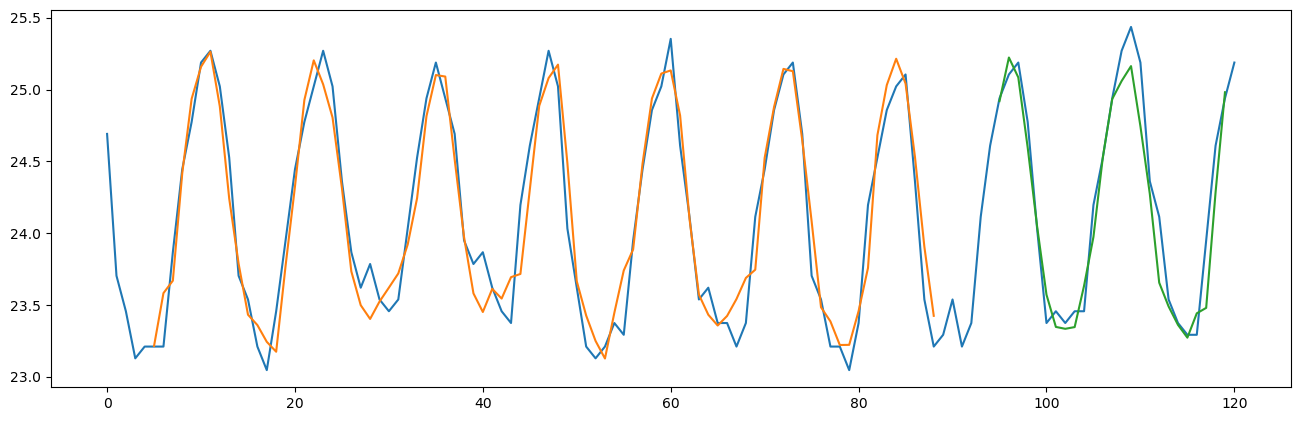

In [4]:
# LSTM for predicting room temperature given the temperature is regulated by Air Conditioner
import numpy 
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pd.read_csv('AC-v3.csv', usecols=[0,2,5], engine='python')
# dataframe
dataframe.rename(columns = {'temp [C]':'temp'}, inplace = True)

dataframe=dataframe.loc[dataframe['Id'] == 53]
dataframe = dataframe.set_index('Time')
dataframe=dataframe.drop(columns=['Id'])
# dataframe
plt.figure(figsize=(16,5), dpi=100)
plt.plot(dataframe)
plt.show()
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# last_values=dataset[len(dataset)-24:len(dataset),:]
# dataset=dataset[0:len(dataset)-24,:]

# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)

testX, testY = create_dataset(test, look_back)
# print("trainX",trainX)
# print("trainY",trainY)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#last_values = numpy.reshape(last_values, (last_values.shape[0], 1, last_values.shape[1]))

testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(np.concatenate((dataset, last_values), axis=None)))
plt.figure(figsize=(16,5), dpi=100)
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

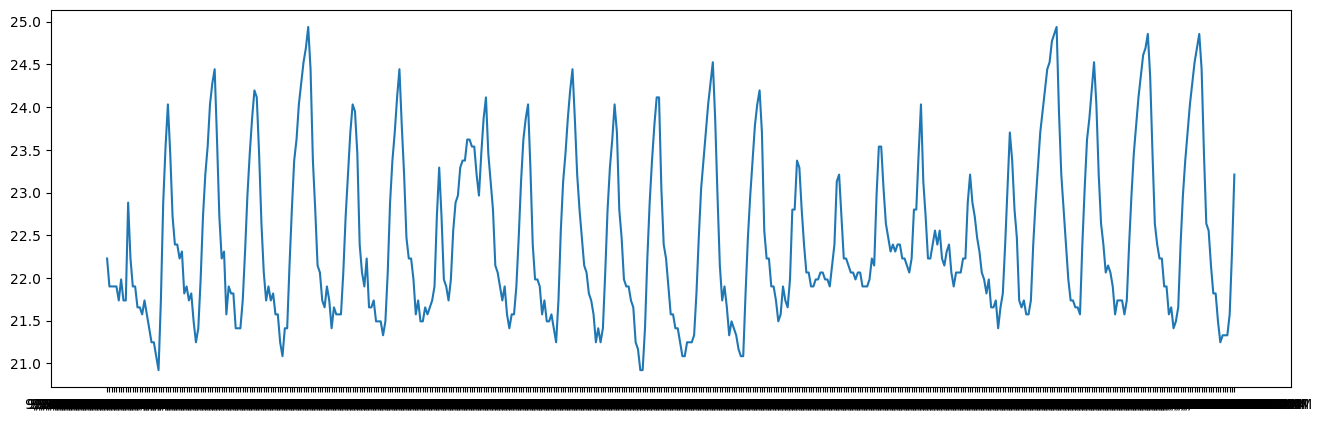

Train on 393 samples
Epoch 1/100
393/393 - 6s - loss: 0.0846
Epoch 2/100
393/393 - 1s - loss: 0.0281
Epoch 3/100
393/393 - 1s - loss: 0.0217
Epoch 4/100
393/393 - 1s - loss: 0.0189
Epoch 5/100
393/393 - 1s - loss: 0.0161
Epoch 6/100
393/393 - 1s - loss: 0.0143
Epoch 7/100
393/393 - 1s - loss: 0.0127
Epoch 8/100
393/393 - 1s - loss: 0.0116
Epoch 9/100
393/393 - 1s - loss: 0.0108
Epoch 10/100
393/393 - 1s - loss: 0.0104
Epoch 11/100
393/393 - 1s - loss: 0.0101
Epoch 12/100
393/393 - 1s - loss: 0.0096
Epoch 13/100
393/393 - 1s - loss: 0.0092
Epoch 14/100
393/393 - 1s - loss: 0.0089
Epoch 15/100
393/393 - 1s - loss: 0.0086
Epoch 16/100
393/393 - 1s - loss: 0.0084
Epoch 17/100
393/393 - 1s - loss: 0.0079
Epoch 18/100
393/393 - 1s - loss: 0.0073
Epoch 19/100
393/393 - 1s - loss: 0.0077
Epoch 20/100
393/393 - 1s - loss: 0.0074
Epoch 21/100
393/393 - 1s - loss: 0.0070
Epoch 22/100
393/393 - 1s - loss: 0.0072
Epoch 23/100
393/393 - 1s - loss: 0.0071
Epoch 24/100
393/393 - 1s - loss: 0.0066
Epoc

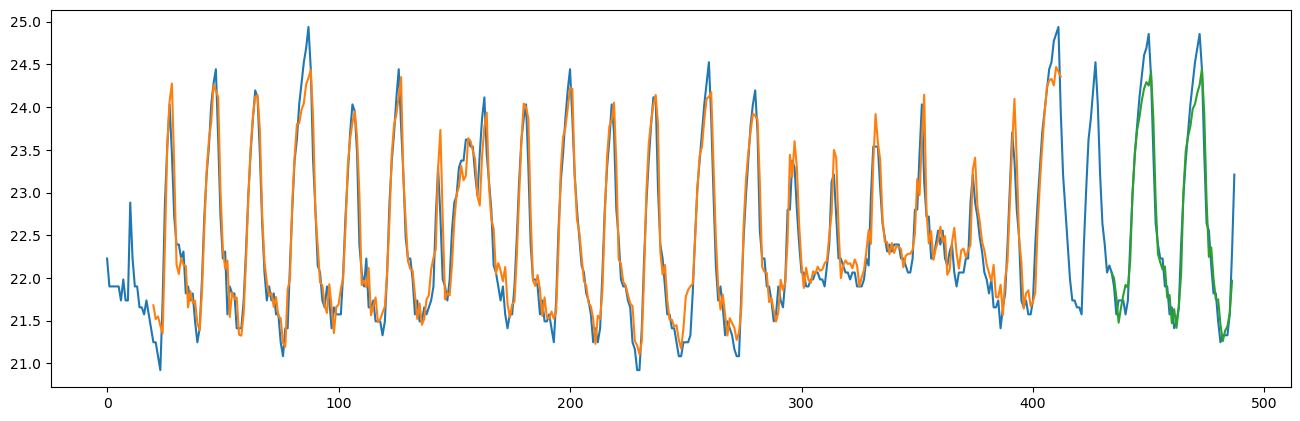

In [7]:
# LSTM for predicting room temperature given the temperature is regulated by Air Conditioner
import numpy 
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pd.read_csv('AC-v4.csv', usecols=[0,2,5], engine='python')
# dataframe
dataframe.rename(columns = {'temp [C]':'temp'}, inplace = True)

dataframe=dataframe.loc[dataframe['Id'] == 53]
dataframe = dataframe.set_index('Time')
dataframe=dataframe.drop(columns=['Id'])

plt.figure(figsize=(16,5), dpi=100)
plt.plot(dataframe)
plt.show()

dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.85)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)

testX, testY = create_dataset(test, look_back)
# print("trainX",trainX)
# print("trainY",trainY)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#last_values = numpy.reshape(last_values, (last_values.shape[0], 1, last_values.shape[1]))

testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(np.concatenate((dataset, last_values), axis=None)))
plt.figure(figsize=(16,5), dpi=100)
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()